# Fungi Classification Data Preprocess/Visualization

In [125]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# basic data info

In [ ]:
# import data
data = pd.read_csv('mushrooms.csv')

In [136]:
data.shape

(8124, 23)

In [61]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [63]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [64]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [71]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# visualization preprocessing

In [ ]:
# create list from categorical columns 
cat_cols = list(data.columns)
# remove target from categorical list for plot purposes
cat_cols.remove('class')

In [51]:
# function to plot all categorical variables against target
def plot_cats(df, cat, target):
    fig, ax = plt.pyplot.subplots()
    ax = sns.countplot(x=cat, hue=target, data=df)
    ax.set_title(f'Count Poisonous VS Edible BY {cat}')

# visualizations

<ipython-input-51-982a1e4c8a72>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.pyplot.subplots()


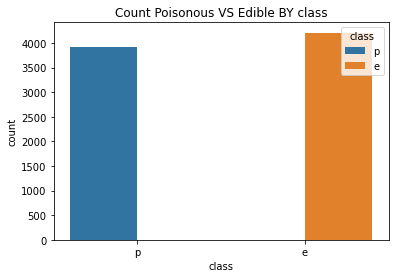

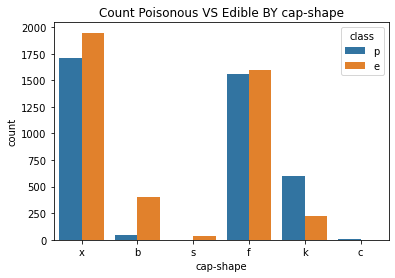

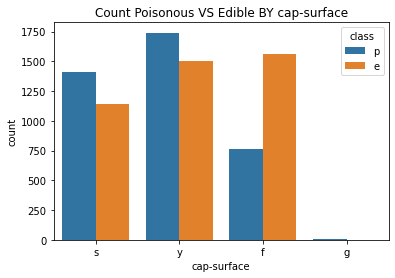

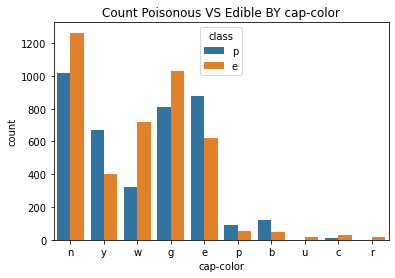

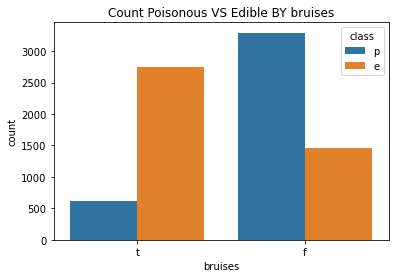

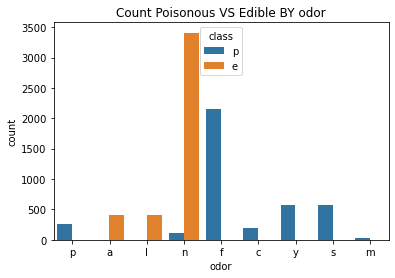

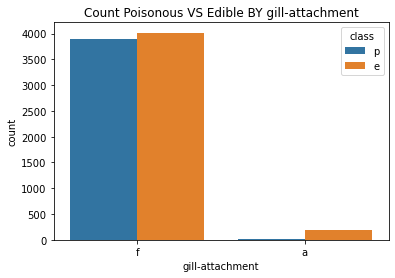

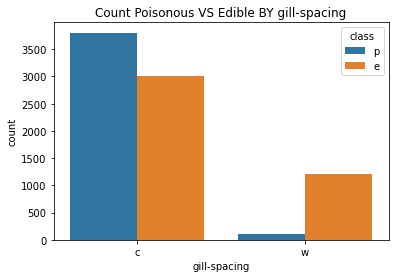

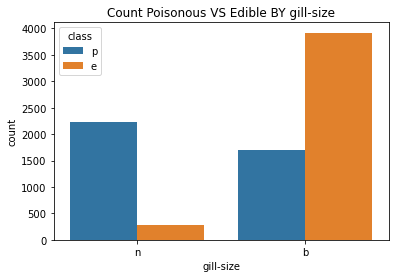

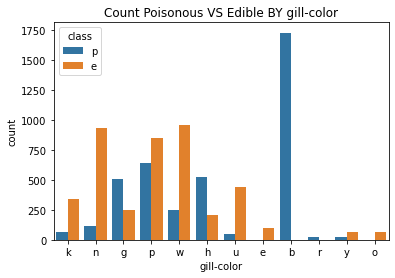

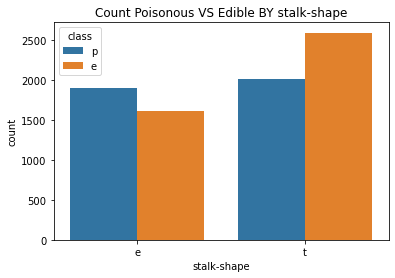

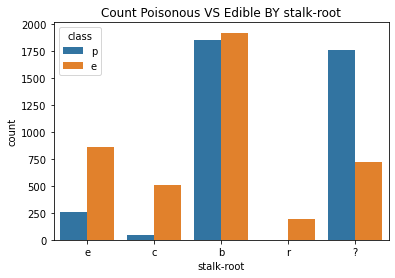

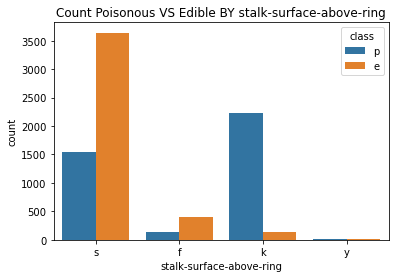

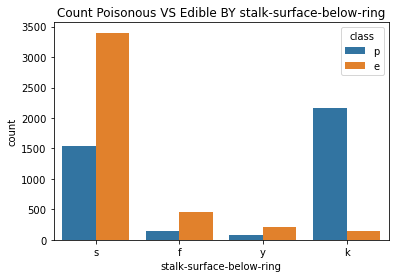

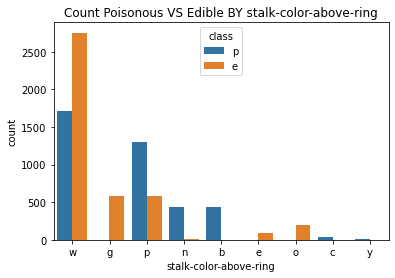

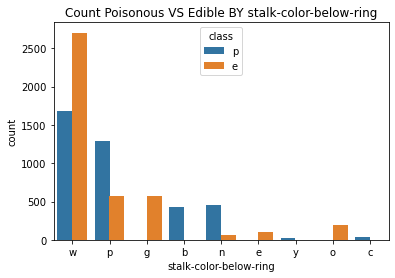

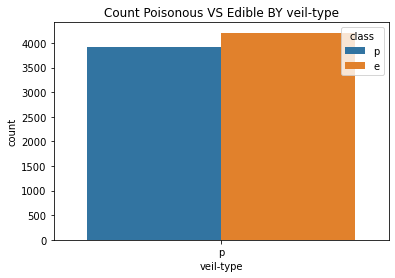

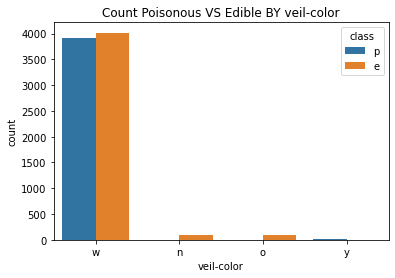

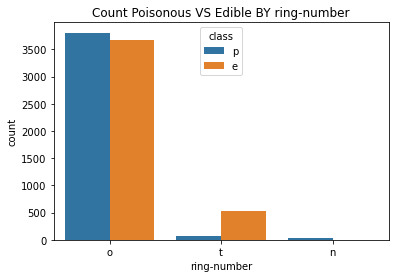

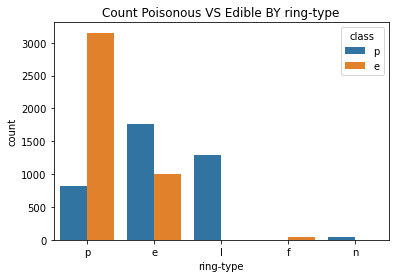

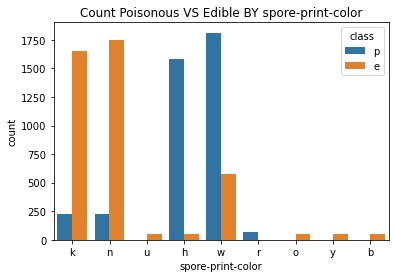

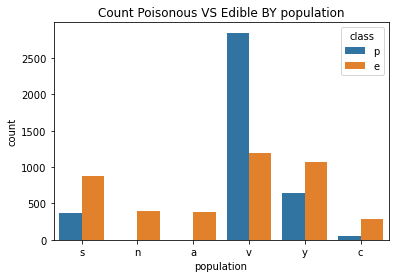

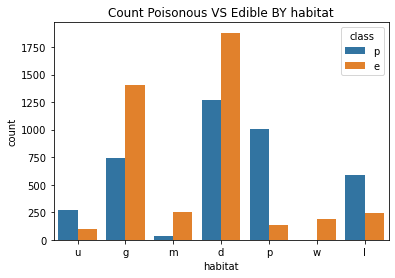

In [52]:
for x in cat_cols:
    plot_cats(data, x, 'class')

In [160]:
# from graphs, it looks like there is only one response in veil-type category
data['veil-type'].describe()

count     8124
unique       1
top          p
freq      8124
Name: veil-type, dtype: object

In [167]:
# drop due to fact that there is no info gained from category
data.drop(columns=['veil-type'], inplace=True)

In [ ]:
def kde_featplot(feature):
    plt.figure(figsize=(10, 8))
    plt.title('KDE {}'. format(feature), fontsize=20)
    ax1 = sns.kdeplot(df[df['churn']==False]  [feature], color='blue', label= 'Churn:False')
    ax2 = sns.kdeplot(df[df['churn']==True] [feature], color='red', label= 'Churn:True')
kde_featplot('account length')

# assess data balance and look at poisonous and edible data separately

In [168]:
# create poisonous only df
p_df = data[data['class'] == "p"]
#create edible only df
e_df = data[data['class'] == "e"]

In [169]:
p_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916
unique,1,5,4,8,2,7,2,2,2,10,...,4,4,6,6,2,3,4,5,4,6
top,p,x,y,n,f,f,f,c,n,b,...,k,k,w,w,w,o,e,w,v,d
freq,3916,1708,1740,1020,3292,2160,3898,3804,2224,1728,...,2228,2160,1712,1680,3908,3808,1768,1812,2848,1268


In [170]:
e_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
unique,1,5,3,10,2,3,2,2,2,10,...,4,4,6,6,3,2,3,8,6,7
top,e,x,f,n,t,n,f,c,b,w,...,s,s,w,w,w,o,p,n,v,d
freq,4208,1948,1560,1264,2752,3408,4016,3008,3920,956,...,3640,3400,2752,2704,4016,3680,3152,1744,1192,1880


# process X and y data

In [171]:
features = data.drop(columns=['class'])

## label encode categorical variables

In [172]:
le = LabelEncoder()

In [173]:
from pandas.api.types import CategoricalDtype

In [174]:
data = data.astype('category')

In [175]:
le_df = data.apply(le.fit_transform)   

In [176]:
le_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## define target variable, 1=poisonous, 0=edible

In [194]:
y = le_df['class']

## define feature variables

In [178]:
le_df.drop(columns=['class'], inplace=True)

## one hot encode X categorical variables

In [179]:
ohe = OneHotEncoder(drop='first', sparse=False) 

In [180]:
ohe.fit(le_df)
ohe.categories_

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6])]

In [181]:
X = ohe.transform(le_df)

In [182]:
X.shape

(8124, 95)

In [183]:
target.shape

(8124,)

In [184]:
X_df = pd.DataFrame(X)

In [185]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [186]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6])]

In [190]:
X_df.to_csv('X.csv')

In [191]:
def cor_selector(X, y ,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
    cor_support, cor_feature = cor_selector(X, y, num_feats)
    print(str(len(cor_feature)), 'selected features')

In [196]:
cor_selector(X_df, y, 25)

([False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  False,
  True,
  True,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False],
 [56,
  38,
  54,
  53,
  61,
  25,
  24,
  33,
  92,
  27,
  82,
  77,
  78,
  49,
  87,
  73,
  76,
  46,
  17,
  28,
  75,
  48,
  45,
  19,
  22])

In [245]:
model = LogisticRegression(solver='saga')
rfe = RFE(model, 300)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\root\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=300 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 95
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [201]:
from sklearn import preprocessing
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import log_loss


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=42,
                                                     test_size=.2)

In [271]:
ss = StandardScaler()
X_ts = ss.fit_transform(X_train)

In [257]:
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    'clf_sgdc': SGDClassifier(),

    'clf_svm': SVC(),
    'clf_ab' : AdaBoostClassifier(),
 
}

# the optimisation parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        'max_features': [5, 10, 12, 15, 20, 50],
        'criterion': ['gini', 'entropy'],
      
         },
    
    'clf_knn': {
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree']
         },

    
    'clf_sgdc' : {
        'max_iter': [1000],
         },
  
    
    'clf_svm' : {
        'kernel': ['rbf', 'sigmoid'], 
        'degree' : [1, 2, 3, 4],
        
        'C': [.01, .03, .05, 1, 10, ],
         },
    

        
    'clf_ab' : {
       'learning_rate': [0.1, 0.01, 0.03, 0.05, 1],
        
        }

                   
                 }

In [266]:

def fit_search(X_data, y_data):
        """
        fits the list of models to the training data, thereby obtaining in each 
        case an evaluation score after GridSearchCV cross-validation
        """
        for name in models.keys():
            est = models[name]
            est_params = params[name]
            gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=50, return_train_score=True)
            gscv.fit(X_data, y_data)
            print("best parameters are: {}".format(gscv.best_estimator_))
            y_pred = gscv.predict(X_data)
            print(classification_report(y_data, y_pred))
    

In [267]:

import warnings
warnings.filterwarnings('ignore') 
fit_search(X_train, y_train)


best parameters are: RandomForestClassifier(n_jobs=-1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

best parameters are: KNeighborsClassifier(algorithm='ball_tree')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

best parameters are: LogisticRegression(max_iter=5, random_state=42, solver='sag')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00 

In [269]:
rf_model = RandomForestClassifier(bootstrap=True, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

1.0